## Time Series Pred: Google Stock Price data
https://www.kaggle.com/wogus934/google-stock/data

** Dataset Information: **

Google Stock Price information for 2013/09-2017/10

** Attribute Information: **

- Open
- High	
- Low	
- Close	
- Volume

** Objective of this project **

predict open price of 2017/10 based on 2013/09-2017/09

## Data

In [12]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
warnings.filterwarnings('ignore')

# Load Data
df_train = pd.read_csv('Google_Stock_Price_Train.csv',index_col='Date')
df_test = pd.read_csv('Google_Stock_Price_Test.csv',index_col='Date')
df = pd.concat([df_train,df_test],axis=0)
print(len(df_train),len(df_test))
df.head()

1258 20


,Open,High,Low,Close,Volume
Date,,,,,
9/26/2012,375.30,381.00,370.87,377.11,5674334
9/27/2012,380.35,381.80,376.20,378.63,3932272
9/28/2012,377.45,380.03,375.95,377.63,2784091
10/1/2012,379.90,382.88,378.48,381.27,3168477
10/2/2012,382.98,383.38,375.51,378.87,2790375


In [3]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
10/18/2017,1011.05,1016.31,1005.32,1012.74,1279780
10/19/2017,1004.75,1007.32,997.30,1001.84,1714243
10/20/2017,1007.05,1008.65,1002.27,1005.07,1606031
10/23/2017,1005.18,1005.79,983.10,985.54,1639294
10/24/2017,986.50,989.26,977.08,988.49,1445129


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1278 entries, 9/26/2012 to 10/24/2017
Data columns (total 5 columns):
Open      1278 non-null float64
High      1278 non-null float64
Low       1278 non-null float64
Close     1278 non-null float64
Volume    1278 non-null int64
dtypes: float64(4), int64(1)
memory usage: 59.9+ KB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,1278.0,6.369939e+02,1.766010e+02,323.32,5.252000e+02,589.975,7.771850e+02,1011.05
High,1278.0,6.416783e+02,1.775229e+02,326.83,5.315200e+02,593.350,7.822350e+02,1016.31
Low,1278.0,6.316210e+02,1.754841e+02,318.32,5.206575e+02,585.355,7.676925e+02,1007.06
Close,1278.0,6.368098e+02,1.766544e+02,323.91,5.241425e+02,589.045,7.762325e+02,1012.74
Volume,1278.0,2.036547e+06,1.064306e+06,521141.00,1.420690e+06,1777782.000,2.301922e+06,12858136.00


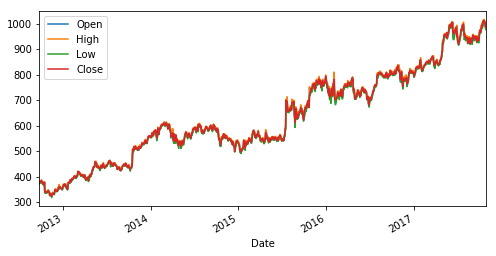

In [6]:
df.index = pd.to_datetime(df.index)
df.drop('Volume',axis=1).plot(figsize=(8,4))

### ETS Decomposition

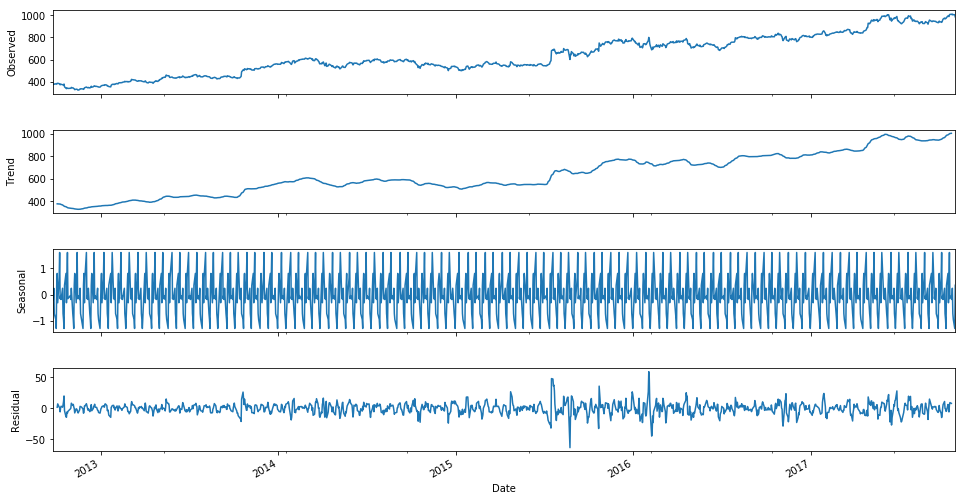

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Open'], freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

### Stationary Data

In [9]:
# Augmented Dickey-Fuller test 
from statsmodels.tsa.stattools import adfuller
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        
        
adf_check(df['Open'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -0.445391830753
p-value : 0.902239670607
#Lags Used : 0
Number of Observations Used : 1277
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


Augmented Dickey-Fuller Test:
ADF Test Statistic : -18.8676583812
p-value : 0.0
#Lags Used : 3
Number of Observations Used : 1273
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


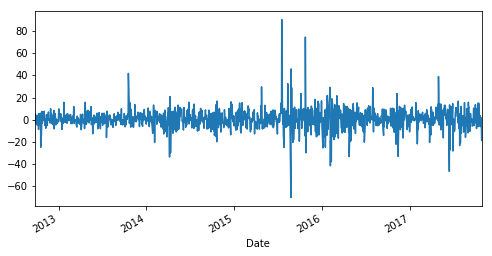

In [10]:
# First Difference
df['Open First Difference'] = df['Open'] - df['Open'].shift(1)
df['Open First Difference'].plot(figsize=(8,4))
adf_check(df['Open First Difference'].dropna())

### Autoregression

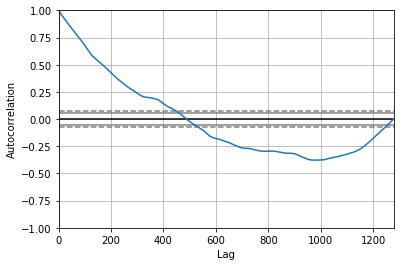

In [11]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Open'])

## Persistence Model (baseline)


Test MSE: 85.314


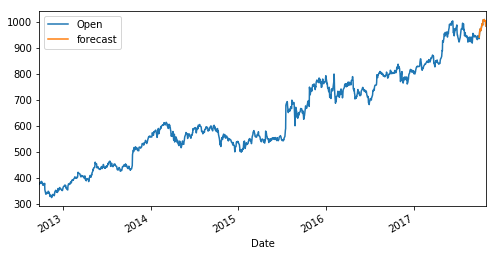

In [15]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
%matplotlib inline
warnings.filterwarnings('ignore')

# Load & Clean Data
df_train = pd.read_csv('Google_Stock_Price_Train.csv',index_col='Date')
df_test = pd.read_csv('Google_Stock_Price_Test.csv',index_col='Date')
df = pd.concat([df_train,df_test],axis=0)
df.index = pd.to_datetime(df.index)

# Data Preprocessing
#lagged dataset
df['Open, t-1'] = df['Open'].shift(1)
df['Open, t+1'] = df['Open']
#print(df.head()) 

#train test set
X = df.values
train, test = X[1:-20], X[-20:]
X_train, y_train = train[:,0], train[:,1]
X_test, y_test = test[:,0], test[:,1]

# Persistence model
def model_persistence(x):
    return x

# Make predictions & Evaluate model
y_pred = list()
for x in X_test:
    yhat = model_persistence(x)
    y_pred.append(yhat)
test_score = mean_squared_error(y_test, y_pred)
print('\nTest MSE: %.3f' % test_score)

# Visualize results
df['forecast'] = np.nan
df['forecast'][-20:]  = y_pred
#df.tail(13)
df[['Open','forecast']].plot(figsize=(8,4))

## Autoregressive Integrated Moving Average (ARIMA) Model

                             ARIMA Model Results                              
Dep. Variable:                 D.Open   No. Observations:                 1257
Model:                ARIMA(10, 1, 0)   Log Likelihood               -4547.887
Method:                       css-mle   S.D. of innovations              9.017
Date:                Sat, 03 Mar 2018   AIC                           9119.774
Time:                        23:34:30   BIC                           9181.412
Sample:                    09-27-2012   HQIC                          9142.939
                         - 09-26-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4466      0.218      2.052      0.040       0.020       0.873
ar.L1.D.Open     -0.0138      0.028     -0.491      0.624      -0.069       0.041
ar.L2.D.Open     -0.0246      0.028     

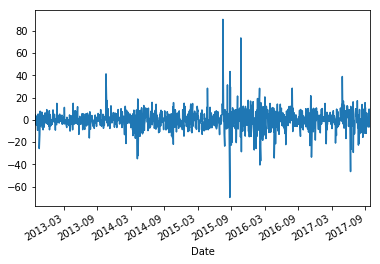

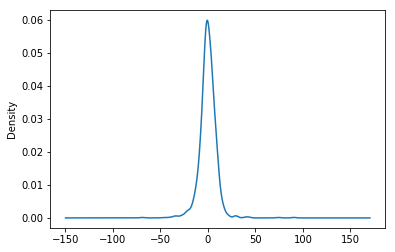

In [46]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline
warnings.filterwarnings('ignore')

# Load & Clean Data
df_train = pd.read_csv('Google_Stock_Price_Train.csv',index_col='Date')
df_test = pd.read_csv('Google_Stock_Price_Test.csv',index_col='Date')
df = pd.concat([df_train,df_test],axis=0)
df.index = pd.to_datetime(df.index)

# Fit ARIMA model to train set
model = ARIMA(df['Open'][:-20], order=(10,1,0))
results = model.fit()
print(results.summary())
results.resid.plot()
plt.show()
results.resid.plot(kind='kde')
plt.show()

Test MSE: 72.883


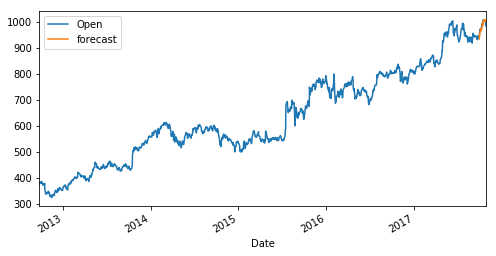

In [53]:
train = df['Open'][:-20].values
test = df['Open'][-20:].values

history = [x for x in train]
y_pred = list()
for t in range(len(test)):
    model = ARIMA(history, order=(10,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    y_pred.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))   

df['forecast'] = np.nan
df['forecast'].iloc[-20:] = y_pred
df[['Open','forecast']].plot(figsize=(8,4))
# rmse
error = mean_squared_error(df['Open'][-20:],
                           df['forecast'][-20:])
print('Test MSE: %.3f' % error)    

## Parameter Tuning

In [55]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
%matplotlib inline

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train, test = X[:-20], X[-20:]
    history = [x for x in train]
    # make predictions
    y_pred = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        y_pred.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, y_pred)
    return error

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

# Load & Clean Data
df_train = pd.read_csv('Google_Stock_Price_Train.csv',index_col='Date')
df_test = pd.read_csv('Google_Stock_Price_Test.csv',index_col='Date')
df = pd.concat([df_train,df_test],axis=0)
df.index = pd.to_datetime(df.index)
    
# evaluate parameters
p_values = [4, 6, 8, 10, 12]
d_values = range(0, 3)
q_values = range(0, 3)
evaluate_models(df['Open'].values, p_values, d_values, q_values)

ARIMA(4, 0, 1) MSE=74.479
ARIMA(4, 0, 2) MSE=68.288
ARIMA(4, 1, 0) MSE=71.672
ARIMA(4, 1, 1) MSE=73.693
ARIMA(4, 1, 2) MSE=72.864
ARIMA(4, 2, 0) MSE=73.166
ARIMA(4, 2, 1) MSE=71.070
ARIMA(6, 0, 0) MSE=75.667
ARIMA(6, 0, 2) MSE=75.490
ARIMA(6, 1, 0) MSE=73.480
ARIMA(6, 1, 1) MSE=73.416
ARIMA(6, 1, 2) MSE=77.880
ARIMA(6, 2, 0) MSE=68.322
ARIMA(6, 2, 1) MSE=72.740
ARIMA(6, 2, 2) MSE=71.227
ARIMA(8, 0, 0) MSE=76.760
ARIMA(8, 0, 1) MSE=76.352
ARIMA(8, 1, 0) MSE=72.837
ARIMA(8, 1, 1) MSE=74.974
ARIMA(8, 2, 0) MSE=76.224
ARIMA(8, 2, 1) MSE=72.110
ARIMA(8, 2, 2) MSE=71.164
ARIMA(10, 0, 0) MSE=75.834
ARIMA(10, 0, 1) MSE=74.723
ARIMA(10, 0, 2) MSE=78.078
ARIMA(10, 1, 0) MSE=72.883
ARIMA(10, 1, 1) MSE=72.353
ARIMA(10, 1, 2) MSE=74.189
ARIMA(10, 2, 0) MSE=76.221
ARIMA(10, 2, 1) MSE=72.130
ARIMA(10, 2, 2) MSE=71.563
ARIMA(12, 0, 1) MSE=74.393
ARIMA(12, 1, 0) MSE=71.993
ARIMA(12, 1, 1) MSE=72.054
ARIMA(12, 1, 2) MSE=73.823
ARIMA(12, 2, 0) MSE=77.355
ARIMA(12, 2, 1) MSE=71.021
ARIMA(12, 2, 2) MSE=72.

## Final Model

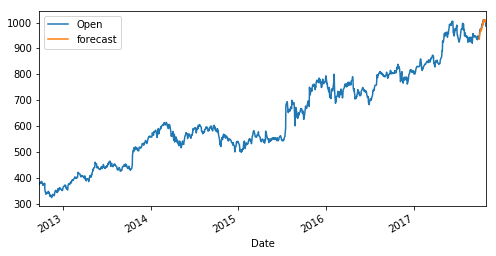

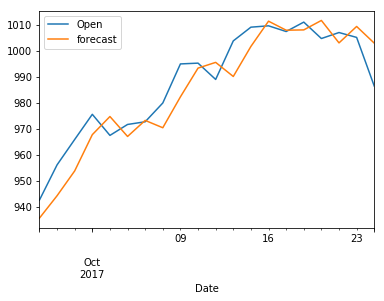

Test MSE: 68.633


In [56]:
# Load & Clean Data
df_train = pd.read_csv('Google_Stock_Price_Train.csv',index_col='Date')
df_test = pd.read_csv('Google_Stock_Price_Test.csv',index_col='Date')
df = pd.concat([df_train,df_test],axis=0)
df.index = pd.to_datetime(df.index)

# Train test sets
train = df['Open'][:-20].values
test = df['Open'][-20:].values

# ARIMA model
history = [x for x in train]
y_pred = list()
for t in range(len(test)):
    model = ARIMA(history, order=(4,0,2))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    y_pred.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))   

df['forecast'] = np.nan
df['forecast'].iloc[-20:] = y_pred
df[['Open','forecast']].plot(figsize=(8,4))
plt.show()
df[['Open','forecast']].iloc[-20:].plot() 
plt.show()
# rmse
error = mean_squared_error(df['Open'][-20:],
                           df['forecast'][-20:])
print('Test MSE: %.3f' % error)